In [7]:
import numpy as np
import matplotlib.pyplot as plt
from  matplotlib import cm
from scipy.stats import norm
import pylab
import pandas as pd
import scipy.interpolate as interp
from mpl_toolkits.mplot3d import Axes3D
import re

In [8]:
data=pd.read_csv("L2_norm_stats_max_samples_call_option.txt",sep='\t', names=["Stats"])
result = data['Stats'].str.split("':",expand=True)
result.rename(columns={0:'Summary', 1:'Number'}, inplace=True)

In [9]:
result['Number'] = result['Number'].map(lambda x: re.sub('}', '', x))
result['Number'] = result['Number'].map(lambda x: re.sub(']', '', x))
result['Number'] = result['Number'].str.strip('[ ')

In [10]:
result['Number'] = result['Number'].astype(float)
print(result)

                                              Summary        Number
0   {'The mean residuals from the run of 5 neural ...  3.358901e-06
1   {'The mean maximum deviation from the run of 5...  3.802347e-03
2   {'The mean L1 norm from the run of 5 neural ne...  9.493480e-07
3   {'The mean L2 norm from the run of 5 neural ne...  6.246007e-08
4   {'The mean L3 norm from the run of 5 neural ne...  2.347093e-06
5   {'The standard deviation of the residuals from...  7.629316e-07
6   {'The standard deviation of the maximum deviat...  5.623867e-04
7   {'The standard deviation of the L1 norm from t...  3.189390e-07
8   {'The standard deviation of the L2 norm from t...  7.718326e-08
9   {'The standards deviation of the L3 norm from ...  4.079822e-07
10  {'The mean residuals from the run of 5 neural ...  7.594625e-05
11  {'The mean maximum deviation from the run of 5...  4.930508e-03
12  {'The mean L1 norm from the run of 5 neural ne...  1.162997e-05
13  {'The mean L2 norm from the run of 5 neural 

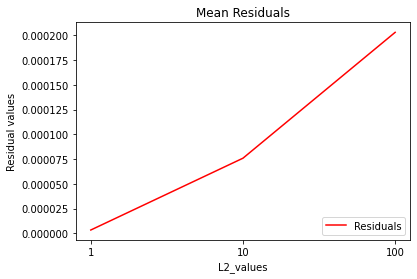

In [19]:
new_index = ['0', '0.5', '1']
df = pd.DataFrame(result.iloc[[0,10,20],[1]])
df.insert(0, "L2_values", [0,0.5,1], True) 
df=df.rename(columns={"Number": "Residuals"})
df.plot(kind='line',x='L2_values',y='Residuals',color='red')
plt.xticks([0, 0.5, 1], ['1', '10', '100'])
plt.title("Mean Residuals")
plt.ylabel("Residual values")
plt.legend(loc="lower right")
plt.savefig('Mean_L2_residuals.png', dpi=50, bbox_inches='tight')

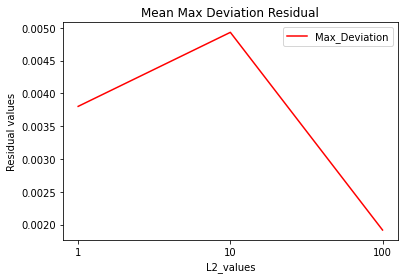

In [20]:
new_index = ['0', '0.5', '1']
df = pd.DataFrame(result.iloc[[1,11,21],[1]])
df.insert(0, "L2_values", [0,0.5,1], True) 
df=df.rename(columns={"Number": "Max_Deviation"})
df.plot(kind='line',x='L2_values',y='Max_Deviation',color='red')
plt.xticks([0, 0.5, 1], ['1', '10', '100'])
plt.title("Mean Max Deviation Residual")
plt.ylabel("Residual values")
plt.legend(loc="upper right")
plt.savefig('Mean_Max_L2_residuals.png', dpi=50, bbox_inches='tight')

  Index     L1_values     L2_values  L3_values  Total_Residual_Value
0     0  9.493480e-07  6.246007e-08   0.000002              0.000003
1   0.5  1.162997e-05  6.428759e-08   0.000058              0.000070
2     1  6.615941e-05  5.641960e-09   0.000131              0.000198


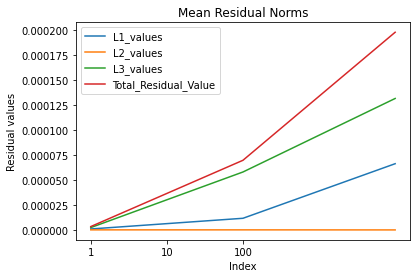

In [18]:
new_index = ['0', '0.5', '1']
df = pd.DataFrame(new_index,columns=['Index'])
df1 = pd.DataFrame(result.iloc[[2,12,22],[1]])
df.insert(1, "L1_values",df1.values) 
df2 = pd.DataFrame(result.iloc[[3,13,23],[1]])
df.insert(2, "L2_values",df2.values) 
df3 = pd.DataFrame(result.iloc[[4,14,24],[1]])
df.insert(3, "L3_values",df3.values) 
df.insert(4,"Total_Residual_Value",df3.values+df2.values+df1.values)
print(df)
df.plot(x="Index", y=["L1_values", "L2_values", "L3_values","Total_Residual_Value"], kind="line")
plt.title("Mean Residual Norms")
plt.xticks([0, 0.5, 1], ['1', '10', '100'])
plt.ylabel("Residual values")
plt.legend(loc="upper left")
plt.savefig('Mean_Total_L2_residuals.png', dpi=50, bbox_inches='tight')

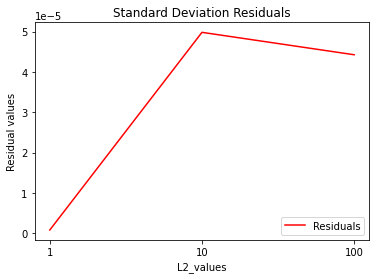

In [21]:
new_index = ['0', '0.5', '1']
df = pd.DataFrame(result.iloc[[5,15,25],[1]])
df.insert(0, "L2_values", [0,0.5,1], True) 
df=df.rename(columns={"Number": "Residuals"})
df.plot(kind='line',x='L2_values',y='Residuals',color='red')
plt.title("Standard Deviation Residuals")
plt.xticks([0, 0.5, 1], ['1', '10', '100'])
plt.ylabel("Residual values")
plt.legend(loc="lower right")
plt.savefig('Standard_deviation_L2_residuals.png', dpi=50, bbox_inches='tight')

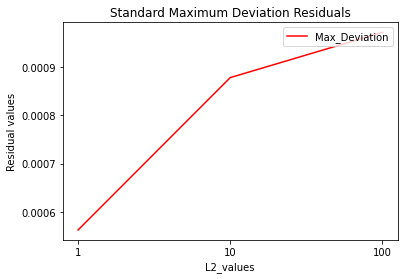

In [22]:
new_index = ['0', '0.5', '1']
df = pd.DataFrame(result.iloc[[6,16,26],[1]])
df.insert(0, "L2_values", [0,0.5,1], True) 
df=df.rename(columns={"Number": "Max_Deviation"})
df.plot(kind='line',x='L2_values',y='Max_Deviation',color='red')
plt.title("Standard Maximum Deviation Residuals")
plt.xticks([0, 0.5, 1], ['1', '10', '100'])
plt.ylabel("Residual values")
plt.legend(loc="upper right")
plt.savefig('Maximum_Standard_deviation_L2_residuals.png', dpi=50, bbox_inches='tight')

  Index     L1_values     L2_values     L3_values  Total_Residual_Value
0     0  3.189390e-07  7.718326e-08  4.079822e-07          8.041045e-07
1   0.5  9.001187e-06  4.200284e-08  3.672293e-05          4.576612e-05
2     1  4.981666e-05  3.265923e-09  4.902888e-05          9.884881e-05


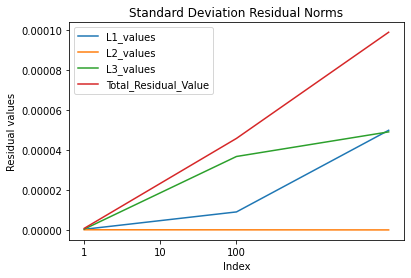

In [23]:
new_index = ['0', '0.5', '1']
df = pd.DataFrame(new_index,columns=['Index'])
df1 = pd.DataFrame(result.iloc[[7,17,27],[1]])
df.insert(1, "L1_values",df1.values) 
df2 = pd.DataFrame(result.iloc[[8,18,28],[1]])
df.insert(2, "L2_values",df2.values) 
df3 = pd.DataFrame(result.iloc[[9,19,29],[1]])
df.insert(3, "L3_values",df3.values) 
df.insert(4,"Total_Residual_Value",df3.values+df2.values+df1.values)
print(df)
df.plot(x="Index", y=["L1_values", "L2_values", "L3_values","Total_Residual_Value"], kind="line")
plt.title("Standard Deviation Residual Norms")
plt.xticks([0, 0.5, 1], ['1', '10', '100'])
plt.ylabel("Residual values")
plt.legend(loc="upper left")
plt.savefig('Total_Standard_deviation_L2_residuals.png', dpi=50, bbox_inches='tight')